In [7]:
# LHS sampler for unloaded in vitro conditions
# Import package which allows us to use Latin Hypercube Sampling
from scipy.stats import qmc
import matplotlib.pyplot as plt
import csv
import numpy as np

In [8]:
# Initialize param set
params = []

# Read in data (Skin parameters from )
with open("skin_parameters.csv", 'r') as param_file:
    reader = csv.reader(param_file, delimiter=',') 
    for row in reader:
        params.append(row) # Read each row and add it to params
        
# Get only the in vivo conditions and format so that each row is the range
in_vivo = np.array(params[5:9]).T

print(in_vivo)

# Get the max and min of each param
max_params = []
min_params = []
for element in in_vivo:
    max_params.append(max(map(float,element))) # Get the max element from each set
    min_params.append(min(map(float,element))) # Get the min element from each set

# Add the angle variation into the max and min sets
max_params.append(90)
min_params.append(0)

[['0.000857' '0.000543' '0.00206' '0.00113']
 ['0.0203' '0.0188' '0.0117' '0.0225']
 ['13.27' '15.32' '8.71' '8.31']
 ['0.29' '0.28' '0.27' '0.3']]


In [9]:
print("mu, k1, k2, kappa, and theta")
print(f'Max Values: {max_params}')
print(f'Min Values: {min_params}')

mu, k1, k2, kappa, and theta
Max Values: [0.00206, 0.0225, 15.32, 0.3, 90]
Min Values: [0.000543, 0.0117, 8.31, 0.27, 0]


In [4]:
(np.array(max_params) + np.array(min_params)) / 2

array([1.3015e-03, 1.7100e-02, 1.1815e+01, 2.8500e-01, 4.5000e+01])

14


([<matplotlib.axis.XTick at 0x1795d5be0>,
 [Text(-0.05, 0, '−0.05'), Text(0.0, 0, '0.00'), Text(0.05, 0, '0.05')])

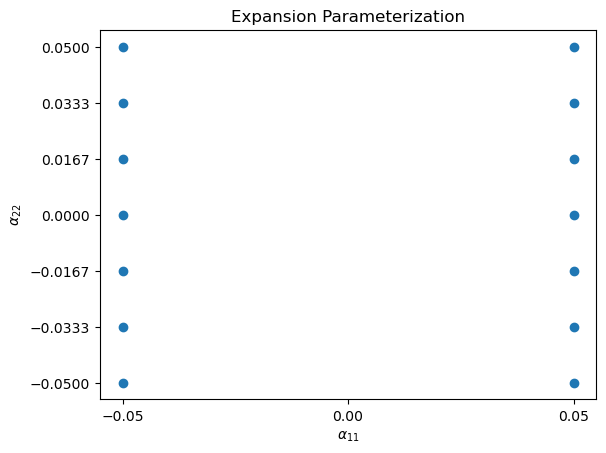

In [5]:
### Set up the structure to sample alpha
# Set alpha_11 to 0.05 and -0.05
import matplotlib.pyplot as plt

alpha_pairs = set()
alpha_scale = np.linspace(-0.05, 0.05, 7)

for element in alpha_scale:
    rounded_element = element.round(9)
    alpha_pairs.add((0.05, rounded_element))
    alpha_pairs.add((-0.05, rounded_element))

    ### We can ignore these parameters, because rotating the membrane by 90 deg replicates the simulation, so we only need this
    # alpha_pairs.add((rounded_element, 0.05))
    # alpha_pairs.add((rounded_element, -0.05))


# Seperate coordinates for plotting
x_points = []
y_points = []
for element in alpha_pairs:
    x_points.append(element[0])
    y_points.append(element[1])
print(len(alpha_pairs))

plt.scatter(x_points, y_points)
plt.title("Expansion Parameterization")
plt.xlabel(r'$\alpha_{11}$')
plt.ylabel(r'$\alpha_{22}$')
plt.axes
plt.yticks(np.linspace(-0.05, 0.05, 7))
plt.xticks(np.linspace(-0.05, 0.05, 3))

In [10]:
alpha_params = []

# ==== New Alpha Stuff ==== 
### Set up the structure to sample alpha
# Set alpha_11 to 0.05 and -0.05
alpha_pairs = set()
alpha_scale = np.linspace(-0.05, 0.05, 7)

for element in alpha_scale:
    rounded_element = element.round(9)
    alpha_pairs.add((0.05, rounded_element))
    alpha_pairs.add((-0.05, rounded_element))

for element in alpha_pairs:
    alpha_params.append(list(element))

print(alpha_params)

[[-0.05, np.float64(-0.05)], [0.05, np.float64(0.05)], [0.05, np.float64(-0.016666667)], [-0.05, np.float64(0.05)], [0.05, np.float64(-0.033333333)], [0.05, np.float64(0.0)], [0.05, np.float64(0.033333333)], [0.05, np.float64(0.016666667)], [-0.05, np.float64(0.016666667)], [-0.05, np.float64(-0.016666667)], [-0.05, np.float64(-0.033333333)], [-0.05, np.float64(0.0)], [-0.05, np.float64(0.033333333)], [0.05, np.float64(-0.05)]]


In [11]:
sampler = qmc.LatinHypercube(d=5, seed=122)

n_samples = 120 # Number of samples that we need
sample = sampler.random(n_samples)

# Scale up to get the true sample parameters
sample_scaled = qmc.scale(sample, min_params, max_params)

# Check that angles are correct
angles = np.zeros(len(sample_scaled))
for ind, element in enumerate(sample_scaled):
    angles[ind] = element[-1] * (np.pi / 180)


In [12]:
non_LHS_angles = np.random.rand(120)
non_LHS_angles = non_LHS_angles * (np.pi / 2)

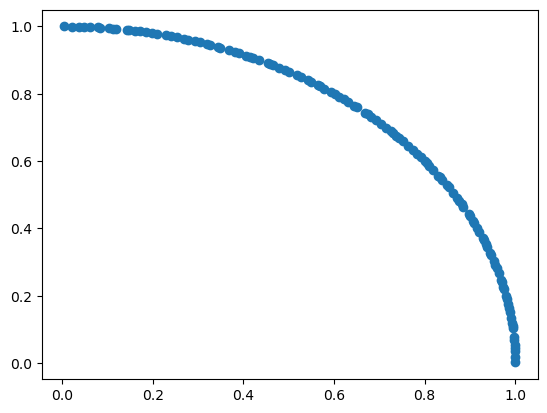

In [13]:
plt.scatter(np.cos(angles), np.sin(angles))

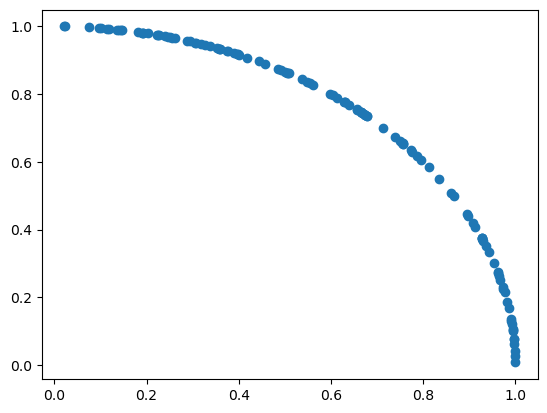

In [14]:
plt.scatter(np.cos(non_LHS_angles), np.sin(non_LHS_angles))

In [10]:
# Write to save to csv
with open("Expanded In Vivo Parameters.csv", 'w') as file:
    csv_writer = csv.writer(file)
    for sample_set in sample_scaled:
        csv_writer.writerow(sample_set)